1. Query icepyx; see what tracks are available in area of interest

2. Save track numbers, beams, and repeat numbers into a dictionary

3. For each track/beam combination, loop over all possible repeat pairs

    A. Load all beams and all repeats for that track using icepyx (?). For all beams / repeats:
    
        - Do whatever we are doing with ATL03
    
        - Fill in nan gaps with noise
        
    B. For each repeat pair:
        
        - Loop across the along track coordinates: 
        
            Choices: window size, search width, running average window size, step, where to save data geographically
            
            Output: Best lag, corresponding correlation coefficient, equivalent along-track velocity
            
        - Save results in a text file with date collected, dx from ATL03 processing, lat, lon, veloc, correlation coefficient, best lag, # contributing nans

In [1]:
from icepyx import icesat2data as ipd
import os
import shutil
from pprint import pprint
%matplotlib inline

# Query icepyx; what data are available for Foundation Ice Stream?

In [13]:
### Set search parameters
# Foundation Ice Stream 
short_name = 'ATL06'
spatial_extent = [-65, -86, -55, -81]
date_range = ['2018-10-14','2020-07-01']

### Create search parameter data object
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)

#build and view the parameters that will be submitted in our query
region_a.CMRparams

#search for available granules and provide basic summary info about them
print(region_a.avail_granules())



ATL06
['2018-10-14', '2020-07-01']
00:00:00
23:59:59
003
['bounding box', [-65, -86, -55, -81]]
{'Number of available granules': 1301, 'Average size of granules (MB)': 99.01522965471507, 'Total size of all granules (MB)': 128818.8137807842}


# Does this location make sense?


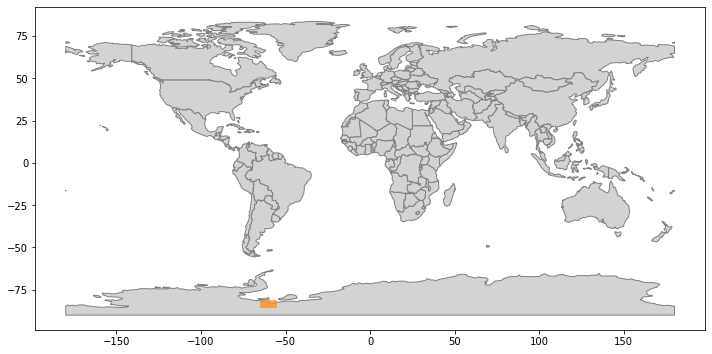

In [5]:
region_a.visualize_spatial_extent()

All info about this dataset we're requesting, in case we need it:

In [10]:
print(region_a.dataset_all_info())

{'feed': {'entry': [{'archive_center': 'NASA NSIDC DAAC',
                     'associations': {'services': ['S1568899363-NSIDC_ECS',
                                                   'S1613669681-NSIDC_ECS',
                                                   'S1613689509-NSIDC_ECS']},
                     'boxes': ['-90 -180 90 180'],
                     'browse_flag': False,
                     'coordinate_system': 'CARTESIAN',
                     'data_center': 'NSIDC_ECS',
                     'dataset_id': 'ATLAS/ICESat-2 L3A Land Ice Height V002',
                     'has_formats': True,
                     'has_spatial_subsetting': True,
                     'has_temporal_subsetting': True,
                     'has_transforms': False,
                     'has_variables': True,
                     'id': 'C1631076765-NSIDC_ECS',
                     'links': [{'href': 'https://n5eil01u.ecs.nsidc.org/ATLAS/ATL06.002/',
                                'hreflang': 'en-US',
 

# Sort available granules; get all track numbers in the dataset


In [18]:
avail_granules = region_a.avail_granules(ids=True)

In [30]:
rgts = {}
for granule_name in avail_granules:
    rgt = granule_name.split('_')[2][0:4]
    track = granule_name.split('_')[2][4:6]
#     print(rgt,track)
    if not rgt in rgts.keys():
        rgts[rgt] = []
        rgts[rgt].append(track)
    else:
        rgts[rgt].append(track)


# all rgt values in our study are are in rgts.keys()
print(rgts.keys())

# available tracks for each rgt are in rgts[rgt]; ex.:
print(rgts['0848'])

# let's work 0848, our first good track friend

dict_keys(['0238', '0247', '0248', '0253', '0254', '0263', '0268', '0278', '0284', '0299', '0308', '0309', '0314', '0324', '0330', '0339', '0345', '0354', '0360', '0369', '0370', '0375', '0385', '0390', '0391', '0400', '0406', '0415', '0421', '0430', '0431', '0436', '0446', '0451', '0452', '0461', '0467', '0476', '0482', '0491', '0492', '0497', '0507', '0512', '0513', '0522', '0528', '0537', '0543', '0552', '0553', '0558', '0567', '0568', '0573', '0574', '0583', '0589', '0598', '0613', '0614', '0628', '0629', '0634', '0635', '0644', '0650', '0659', '0665', '0675', '0680', '0705', '0710', '0711', '0720', '0726', '0735', '0741', '0751', '0756', '0766', '0771', '0772', '0781', '0787', '0796', '0802', '0811', '0812', '0817', '0827', '0832', '0833', '0842', '0848', '0857', '0863', '0873', '0878', '0888', '0893', '0894', '0903', '0909', '0918', '0924', '0933', '0934', '0949', '0955', '0964', '0970', '0979', '0985', '0994', '0995', '1000', '1010', '1015', '1016', '1025', '1031', '1055', '1056

# Login to NASA Earthdata

In [16]:
earthdata_uid = 'cgbarcheck'
email = 'grace.barcheck@cornell.edu'
region_a.earthdata_login(earthdata_uid, email)

Earthdata Login password:  ·············


In [ ]:
rgt = '0848'

In [35]:
# how to subset using rgt?
# Data Variables: 'rgt': ['orbit_info/rgt'], << now just need to figure out how to use this!
region_a.show_custom_options(dictview=True)
region_a.order_vars.parse_var_list(region_a.order_vars.avail)

Subsetting options
[{'id': 'ICESAT2',
  'maxGransAsyncRequest': '2000',
  'maxGransSyncRequest': '100',
  'spatialSubsetting': 'true',
  'spatialSubsettingShapefile': 'true',
  'temporalSubsetting': 'true',
  'type': 'both'}]
Data File Formats (Reformatting Options)
['TABULAR_ASCII', 'NetCDF4-CF', 'Shapefile', 'NetCDF-3']
Reprojection Options
[]
Data File (Reformatting) Options Supporting Reprojection
['TABULAR_ASCII', 'NetCDF4-CF', 'Shapefile', 'NetCDF-3', 'No reformatting']
Data File (Reformatting) Options NOT Supporting Reprojection
[]
Data Variables (also Subsettable)
{'atl06_quality_summary': ['gt1l/land_ice_segments/atl06_quality_summary',
                           'gt1r/land_ice_segments/atl06_quality_summary',
                           'gt2l/land_ice_segments/atl06_quality_summary',
                           'gt2r/land_ice_segments/atl06_quality_summary',
                           'gt3l/land_ice_segments/atl06_quality_summary',
                           'gt3r/land_ice_segm

TypeError: 'method' object is not iterable

In [42]:

region_a.order_vars.append(keyword_list=['']) # can find valid keywords in this error message
# ground_track ?

ValueError: Invalid keyword: . Please select from this list: ancillary_data, bias_correction, dem, fit_statistics, geophysical, ground_track, gt1l, gt1r, gt2l, gt2r, gt3l, gt3r, land_ice, land_ice_segments, none, orbit_info, quality_assessment, residual_histogram, segment_quality, signal_selection_status

In [44]:
# Build wanted variable list
region_a.order_vars.wanted
region_a.order_vars.append(defaults=True) # a long list of desired data
region_a.order_vars.remove(all=True) # get rid of all of them

# Add just the ones we want:
region_a.order_vars.append(var_list=['cycle_number','data_start_utc','data_end_utc',
                                     'ds_segment_id','start_cycle','end_cycle','start_rgt',
                                     'end_rgt','h_li','h_li_sigma','latitude','longitude',
                                     'rgt','segment_id','x_atc','y_atc'])

var_dict = region_a.order_vars.append(keyword_list=['ground_track']) # but what does this accomplish???



pprint(region_a.order_vars.wanted)


{'atlas_sdp_gps_epoch': ['ancillary_data/atlas_sdp_gps_epoch'],
 'cycle_number': ['orbit_info/cycle_number'],
 'data_end_utc': ['ancillary_data/data_end_utc'],
 'data_start_utc': ['ancillary_data/data_start_utc'],
 'ds_segment_id': ['gt1l/residual_histogram/ds_segment_id',
                   'gt1r/residual_histogram/ds_segment_id',
                   'gt2l/residual_histogram/ds_segment_id',
                   'gt2r/residual_histogram/ds_segment_id',
                   'gt3l/residual_histogram/ds_segment_id',
                   'gt3r/residual_histogram/ds_segment_id'],
 'end_cycle': ['ancillary_data/end_cycle'],
 'end_delta_time': ['ancillary_data/end_delta_time'],
 'end_rgt': ['ancillary_data/end_rgt'],
 'granule_end_utc': ['ancillary_data/granule_end_utc'],
 'granule_start_utc': ['ancillary_data/granule_start_utc'],
 'h_li': ['gt1l/land_ice_segments/h_li',
          'gt1r/land_ice_segments/h_li',
          'gt2l/land_ice_segments/h_li',
          'gt2r/land_ice_segments/h_li',
       